In [67]:
import torch
import torch.backends.cudnn as cudnn
device = torch.cuda.set_device('cuda:1')
import matplotlib.pyplot as plt
from skimage.io import imread 
from skimage.transform import resize
import numpy as np
from utils import *
from albumentations.augmentations import transforms
from albumentations.core.composition import Compose

In [68]:
import archs

In [69]:
model = archs.NestedUNet(1, 3, False)

In [70]:
model = model.cuda()

In [71]:
#Load save model
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [72]:
model.eval()

NestedUNet(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (up): Upsample(scale_factor=2.0, mode=bilinear)
  (conv0_0): VGGBlock(
    (relu): ReLU(inplace=True)
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv1_0): VGGBlock(
    (relu): ReLU(inplace=True)
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2_0): VGGBlock(
    (relu): ReLU(inplace=True)
    

In [73]:
network_size = (256,256,3)

In [74]:
overlap = 0

In [75]:
image = imread('/data/spacenet/bldg/data/validation/MUL/MUL-PanSharpen_AOI_2_Vegas_img1023.tif')
image = np.array((image[:,:,[4,2,1]]/(image[:,:,[4,2,1]].max()+1e-10)), dtype=np.float32)
image = np.array(image*255, dtype=np.uint8)
#image = image.astype('float32') / 255


In [76]:
val_transform = Compose([
        transforms.Resize(256, 256),
        transforms.Normalize(),
    ])

In [77]:
img = val_transform(image=image)
img = img['image'].astype(np.float32)
img = img.transpose(2, 0, 1)
img = img.reshape(1, 3, 256, 256)
img = torch.from_numpy(img)
img = img.cuda()

In [87]:
with torch.no_grad():
    #output = model(tilesArr)
    output = model(img)
    output = torch.sigmoid(output).cpu().numpy()

In [91]:
output = (output * 255).astype('uint8')

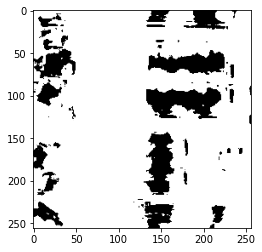

In [92]:
plt.imshow(output[0,0,:,:], cmap = 'gray')

In [81]:
torch.cuda.empty_cache()

In [82]:
final = assemble_pred(output, corners, image, network_size)

NameError: name 'corners' is not defined